Shot #1 already exists and will not be overwritten.
Shot #2 already exists and will not be overwritten.
Shot #3 already exists and will not be overwritten.


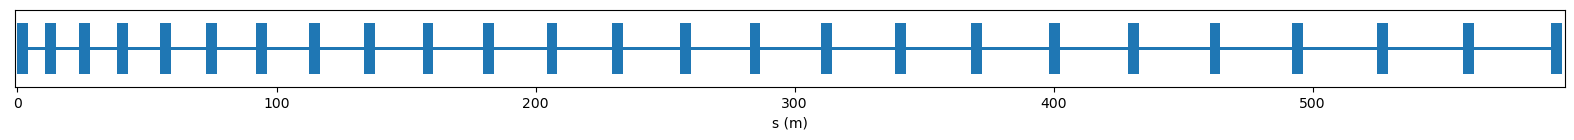

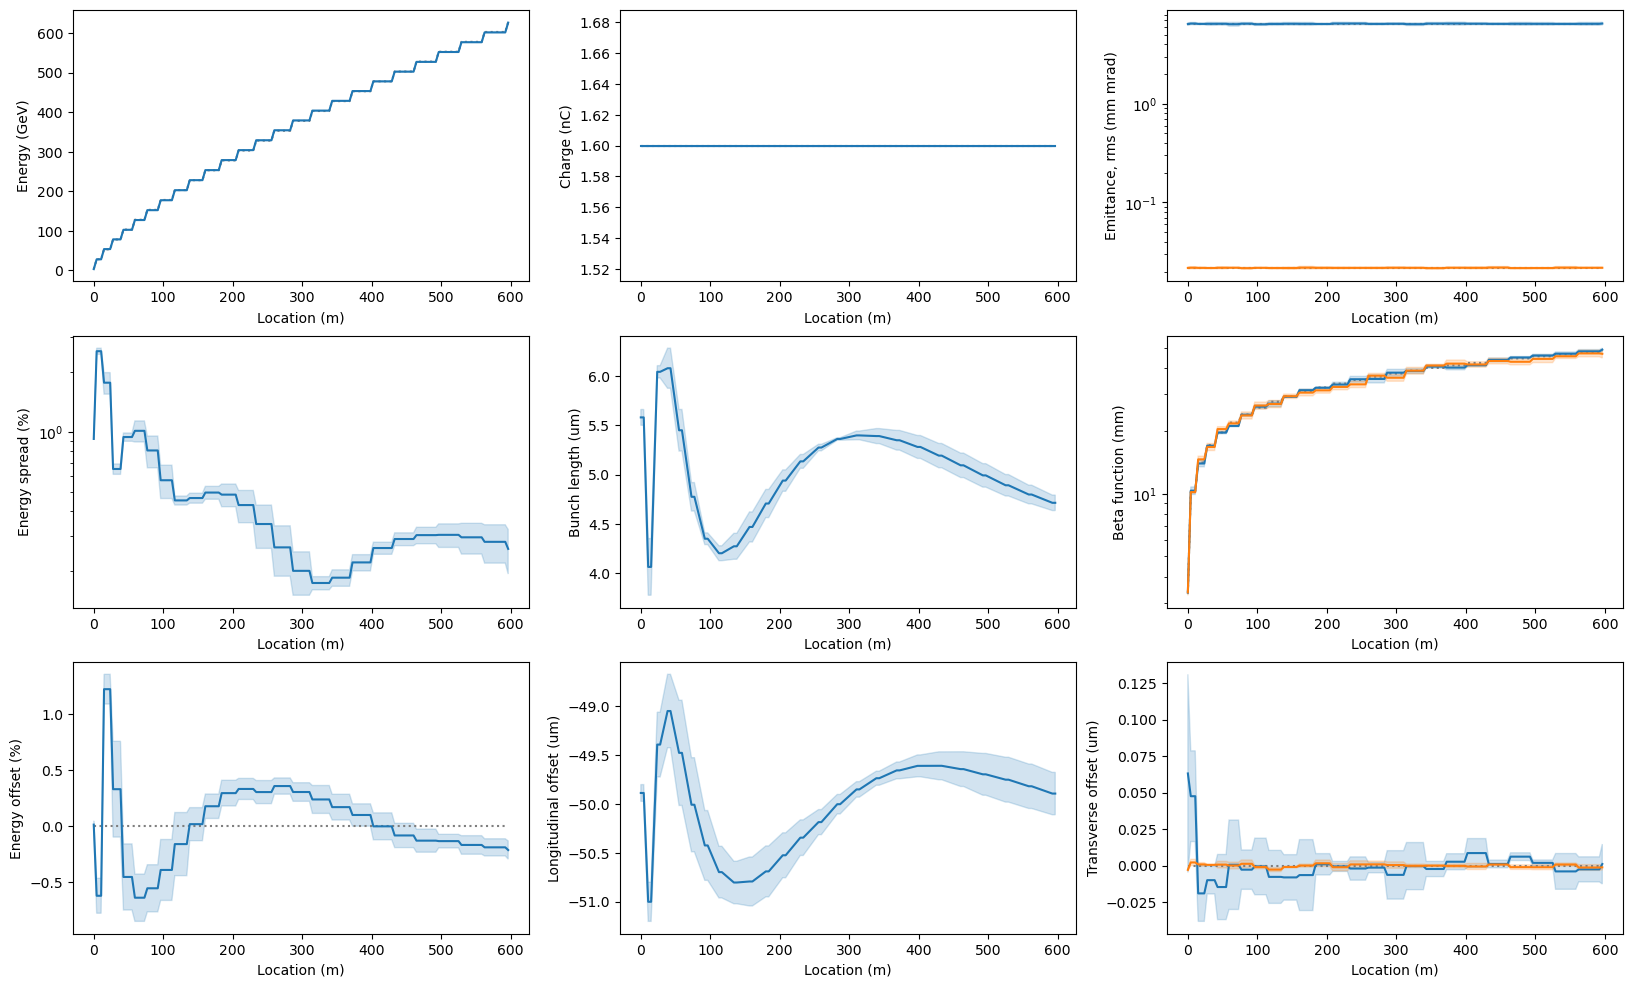

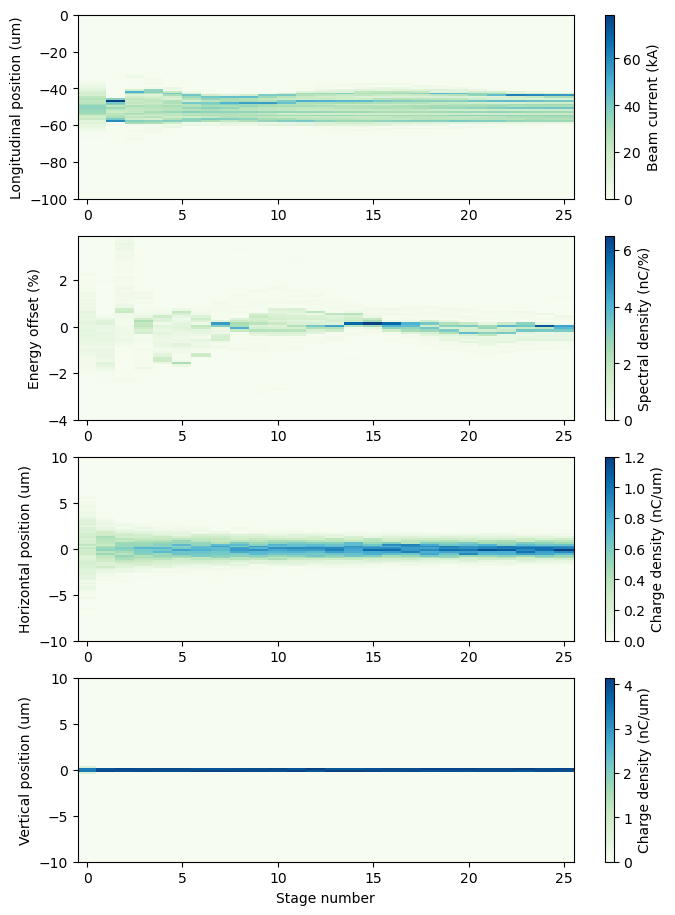

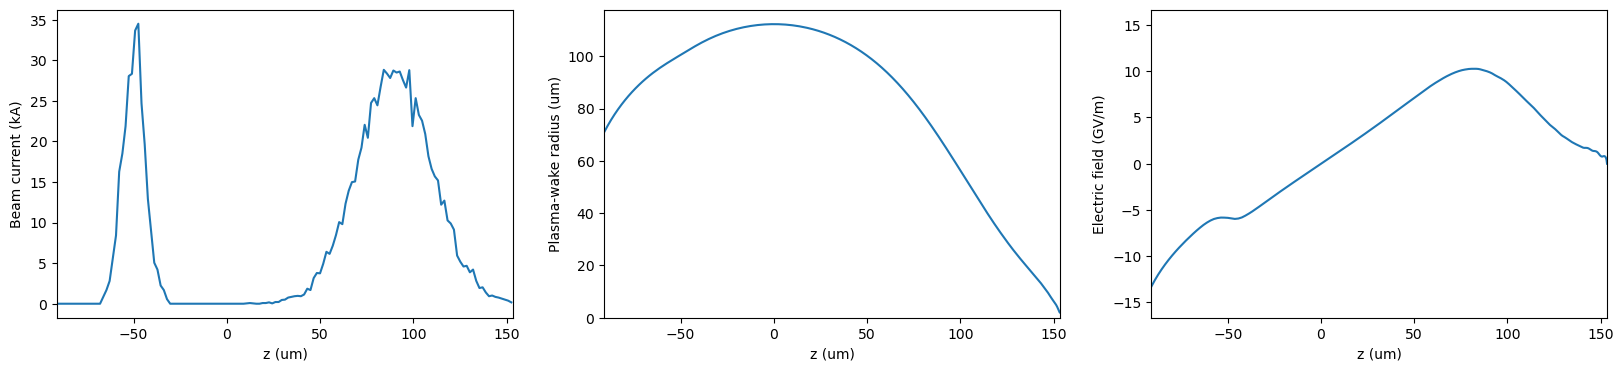

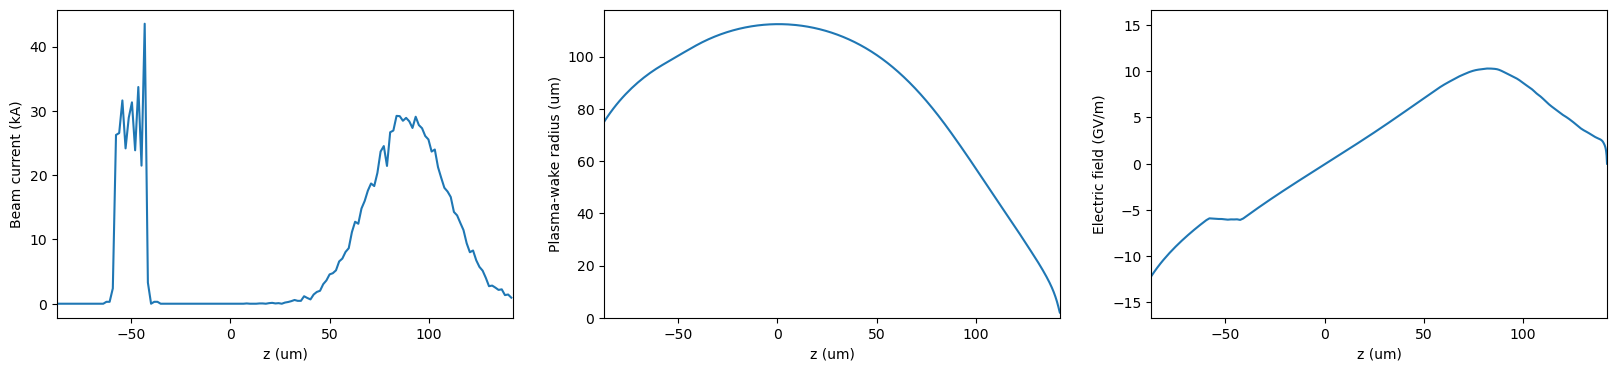

In [6]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, InterstageBasic, Linac
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define driver
driver = SourceBasic()
driver.Q = -4.8e-9 # [C]
driver.E0 = 25e9 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 90e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 30e-3, 30e-3 # [m]
driver.Npart = 20000

# define driven stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.deltaE = 25e9 # [eV]
stage.L = 4.2 # [m]
stage.n0 = 3e22 # [m^-3]
stage.enableBetatron = True

# define witness bunch
witness = SourceBasic()
witness.Q = -1.6e-9 # [C]
witness.E0 = 3e9 # [eV]
witness.relsigE = 0.01
witness.sigz = 6e-6 # [m]
witness.z = -50e-6 # [m]
witness.emitnx, witness.emitny = 10e-6, 0.035e-6 # [m rad]
witness.betax = beta_matched(stage.n0, witness.E0)
witness.betay = witness.betax
witness.Npart = 1000

# define interstage
#interstage = InterstageELEGANT()
#interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
#interstage.Bdip = 0.5 # [T]
#interstage.Ldip = lambda E: 0.8 * np.sqrt(E/10e9) # [m(eV)]

# define interstage
interstage = InterstageBasic()
interstage.R56 = lambda E: -3e-4 * np.sqrt(10e9/E) # [m(eV)]
interstage.L = lambda E: 3.83 * np.sqrt(E/10e9) # [m(eV)]

# define linac
linac = Linac(witness, stage, interstage, Nstages=25)

# track particles
beam = linac.run("ahhf", shots=3, overwrite=False)

# plot survery and beam evolution
linac.plotSurvey()
linac.plotEvolution()
linac.plotWaterfalls()
beam0 = witness.track()
stage.plotWakefield(beam0)
stage.plotWakefield(beam)